✓ All packages imported successfully
Mounted at /content/drive
Dataset shape: (28383, 11)

Columns: ['Object Number', 'Area_M01', 'Aspect Ratio_M01', 'Gradient RMS_M01_BF 1', 'Intensity_MC_Sytox Orange', 'Intensity_MC_HOECHST', 'Area_HO (Area)', 'exDNA (Area)', 'Circularity HO', 'Source File', 'Treatment Group']

First few rows:
   Object Number    Area_M01  Aspect Ratio_M01  Gradient RMS_M01_BF 1  \
0              7  118.777778          0.889680              56.936435   
1              9  120.666667          0.986558              57.026742   
2             12   74.111111          0.824473              60.386863   
3             13  148.444444          0.886844              52.628676   
4             18  120.666667          0.704513              67.590521   

   Intensity_MC_Sytox Orange  Intensity_MC_HOECHST  Area_HO (Area)  \
0                35148.04661           221688.9703       25.222222   
1                34365.50000           153592.0625       28.777778   
2                232

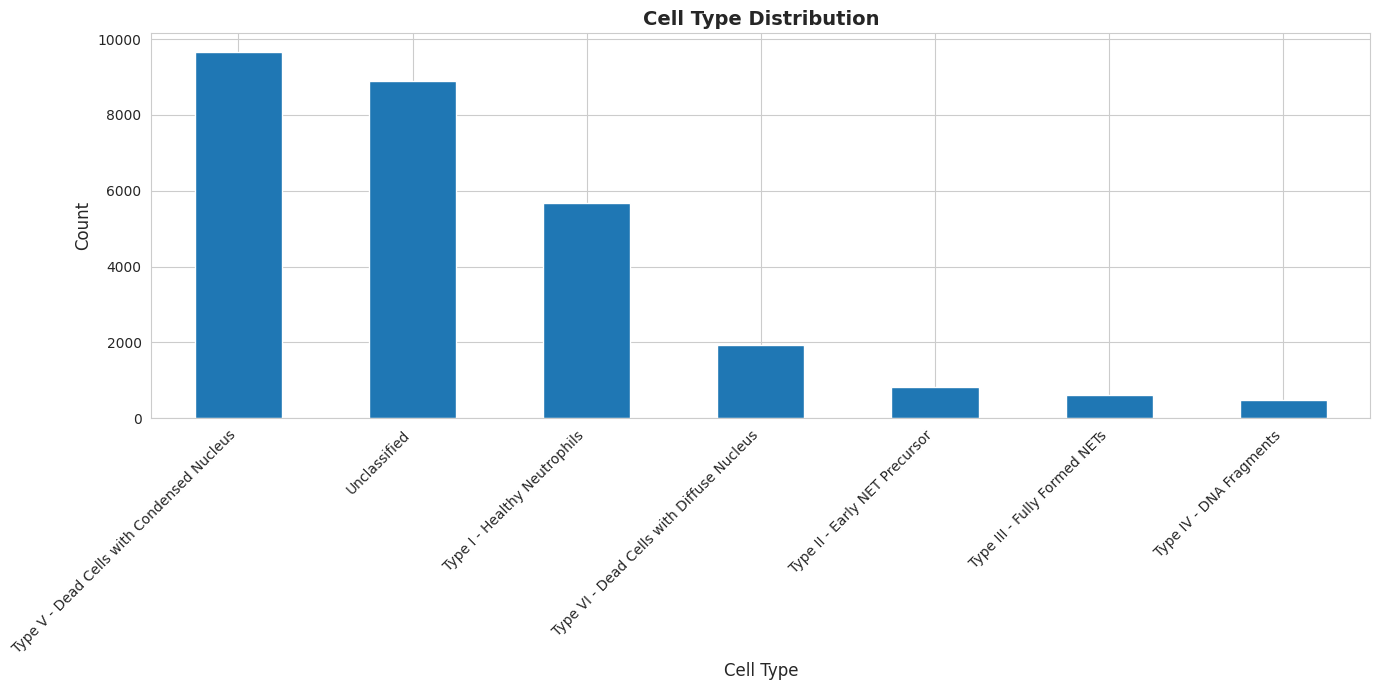


Cell Type by Treatment Group:
Treatment Group                             PMA_Treated  UnTx
Cell Type                                                    
Type I - Healthy Neutrophils                       1430  4240
Type II - Early NET Precursor                       382   447
Type III - Fully Formed NETs                        278   332
Type IV - DNA Fragments                             366   114
Type V - Dead Cells with Condensed Nucleus         4693  4976
Type VI - Dead Cells with Diffuse Nucleus           853  1092
Unclassified                                       3828  5058


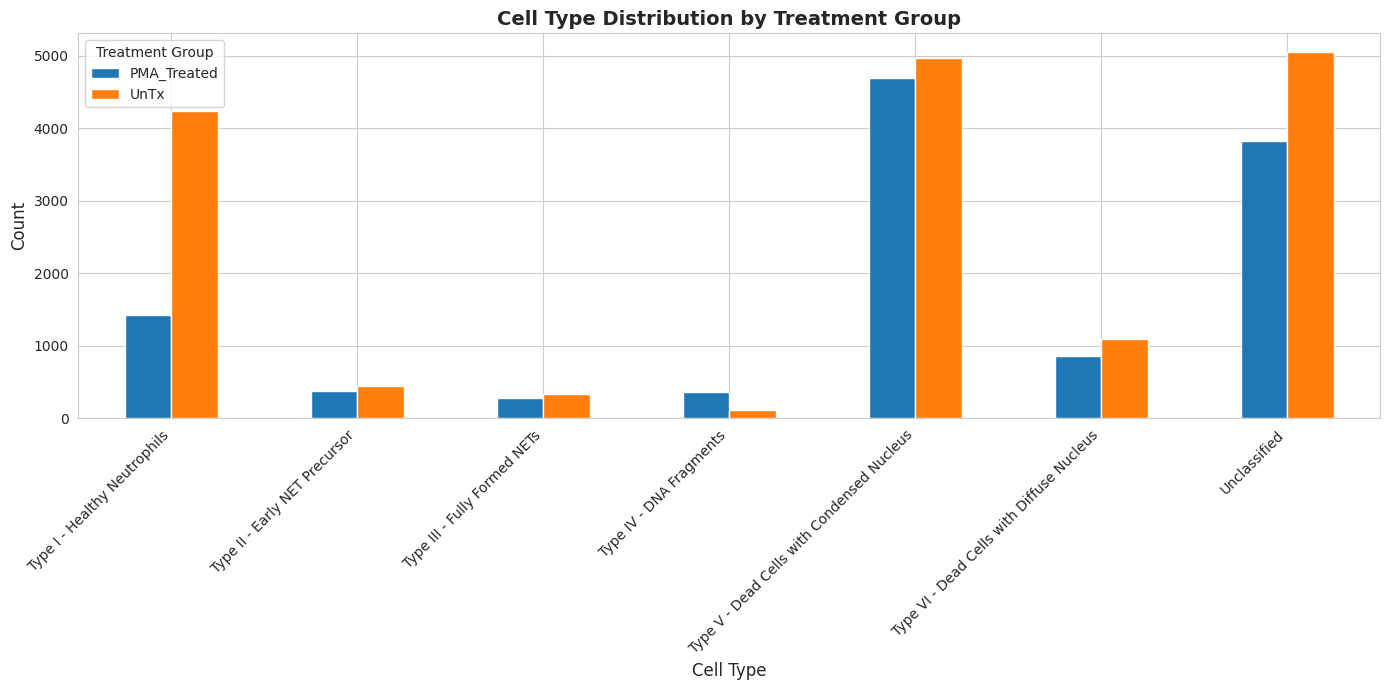


FEATURE ENGINEERING
Total features: 15
Features: ['Area_M01', 'Aspect Ratio_M01', 'Gradient RMS_M01_BF 1', 'Intensity_MC_Sytox Orange', 'Intensity_MC_HOECHST', 'Area_HO (Area)', 'exDNA (Area)', 'Circularity HO', 'Nuclear_Cytoplasmic_Ratio', 'DNA_Content_Ratio', 'Cell_Density', 'Membrane_Integrity', 'Intensity_MC_Sytox Orange_log', 'Intensity_MC_HOECHST_log', 'exDNA (Area)_log']

TRAIN-TEST SPLIT
Training set size: (22471, 15)
Test set size: (5618, 15)

Training set class distribution:
Cell Type
Type V - Dead Cells with Condensed Nucleus    7735
Unclassified                                  7109
Type I - Healthy Neutrophils                  4536
Type VI - Dead Cells with Diffuse Nucleus     1556
Type II - Early NET Precursor                  663
Type III - Fully Formed NETs                   488
Type IV - DNA Fragments                        384
Name: count, dtype: int64

FEATURE SCALING
✓ Features scaled using RobustScaler

ADDRESSING CLASS IMBALANCE

Original class distribution:
Cell

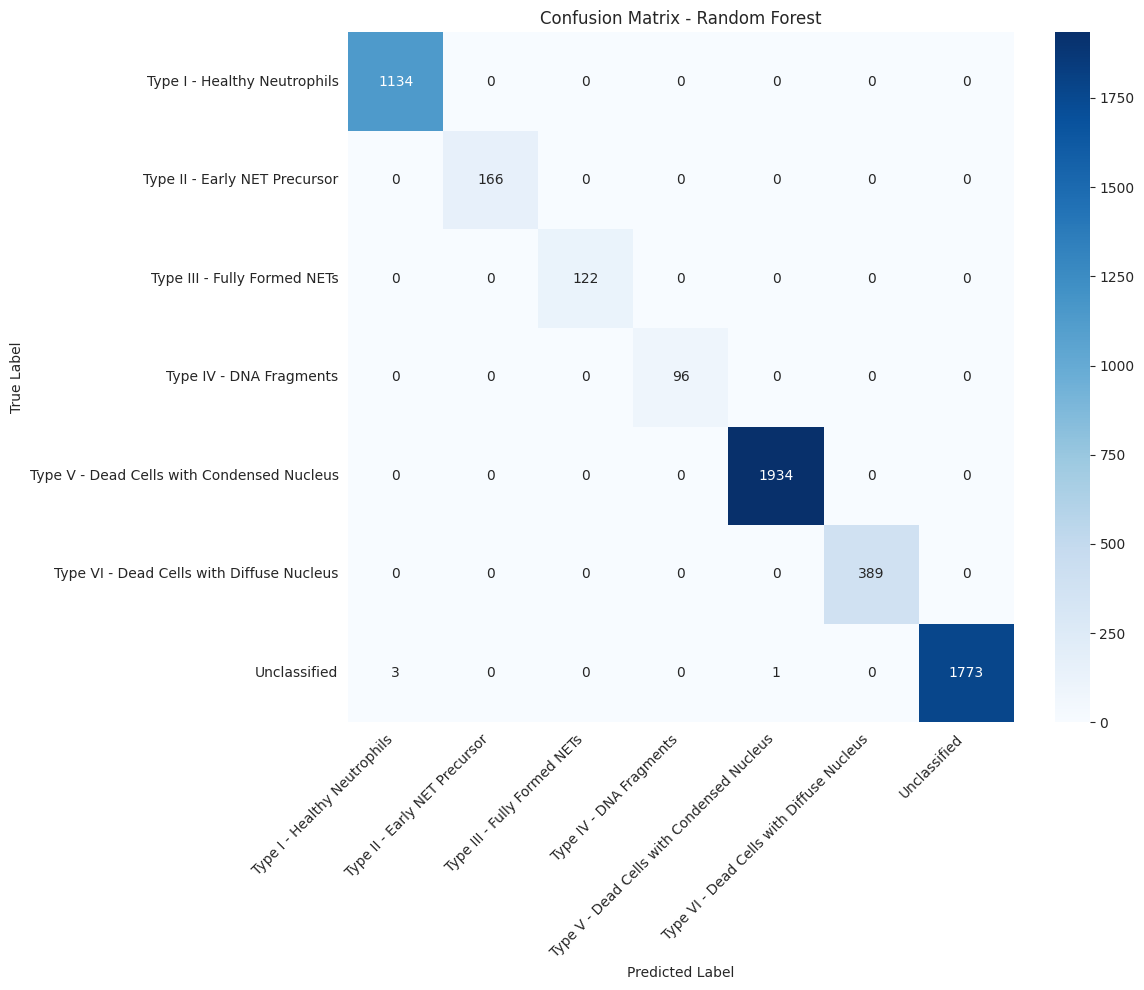


Per-Class Metrics:
                                        Class  Precision    Recall  F1-Score  \
0                Type I - Healthy Neutrophils   0.997361  1.000000  0.998679   
1               Type II - Early NET Precursor   1.000000  1.000000  1.000000   
2                Type III - Fully Formed NETs   1.000000  1.000000  1.000000   
3                     Type IV - DNA Fragments   1.000000  1.000000  1.000000   
4  Type V - Dead Cells with Condensed Nucleus   0.999483  1.000000  0.999742   
5   Type VI - Dead Cells with Diffuse Nucleus   1.000000  1.000000  1.000000   
6                                Unclassified   1.000000  0.997749  0.998873   

   Support  
0     1134  
1      166  
2      122  
3       96  
4     1934  
5      389  
6     1777  

REPEATED STRATIFIED CROSS-VALIDATION

Cross-validation results:
Mean accuracy: 0.9997709474726839 (+/- 0.0002866459133386432 )
Min accuracy: 0.9995357043365215
Max accuracy: 1.0


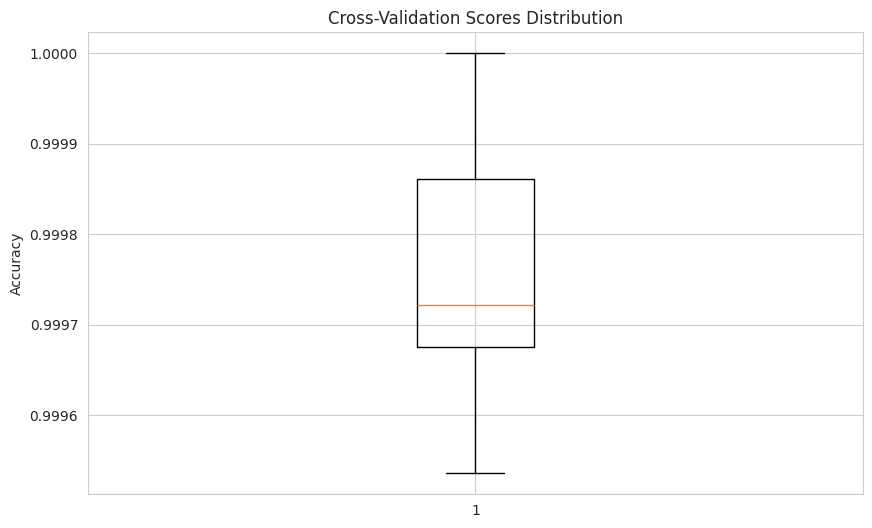


SHAP ANALYSIS


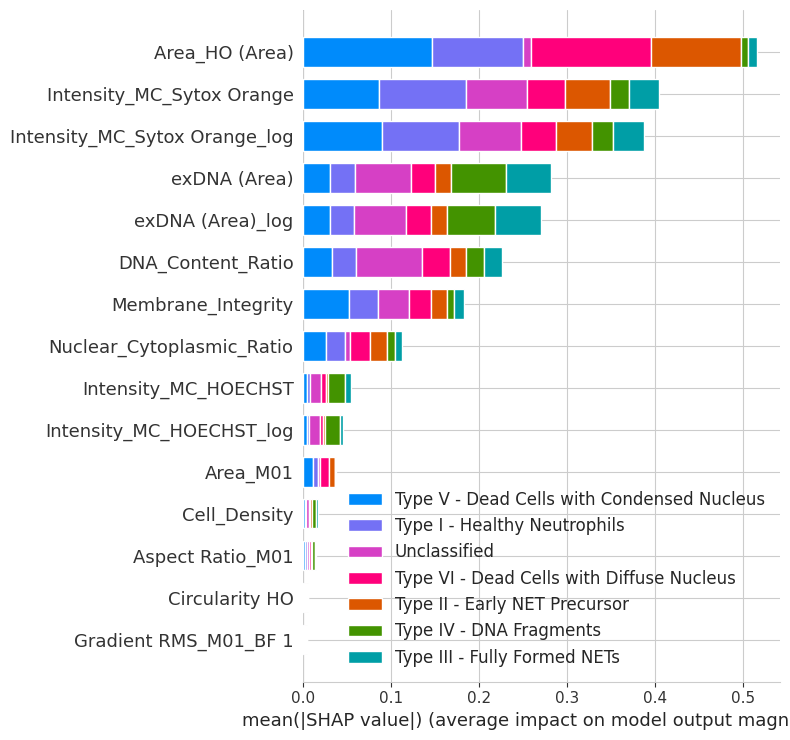


Top 10 Most Important Features:
                          Feature  Importance
5                  Area_HO (Area)    0.185057
3       Intensity_MC_Sytox Orange    0.145464
12  Intensity_MC_Sytox Orange_log    0.139116
6                    exDNA (Area)    0.100515
14               exDNA (Area)_log    0.094284
11             Membrane_Integrity    0.084649
8       Nuclear_Cytoplasmic_Ratio    0.075239
9               DNA_Content_Ratio    0.072949
4            Intensity_MC_HOECHST    0.029766
13       Intensity_MC_HOECHST_log    0.024220


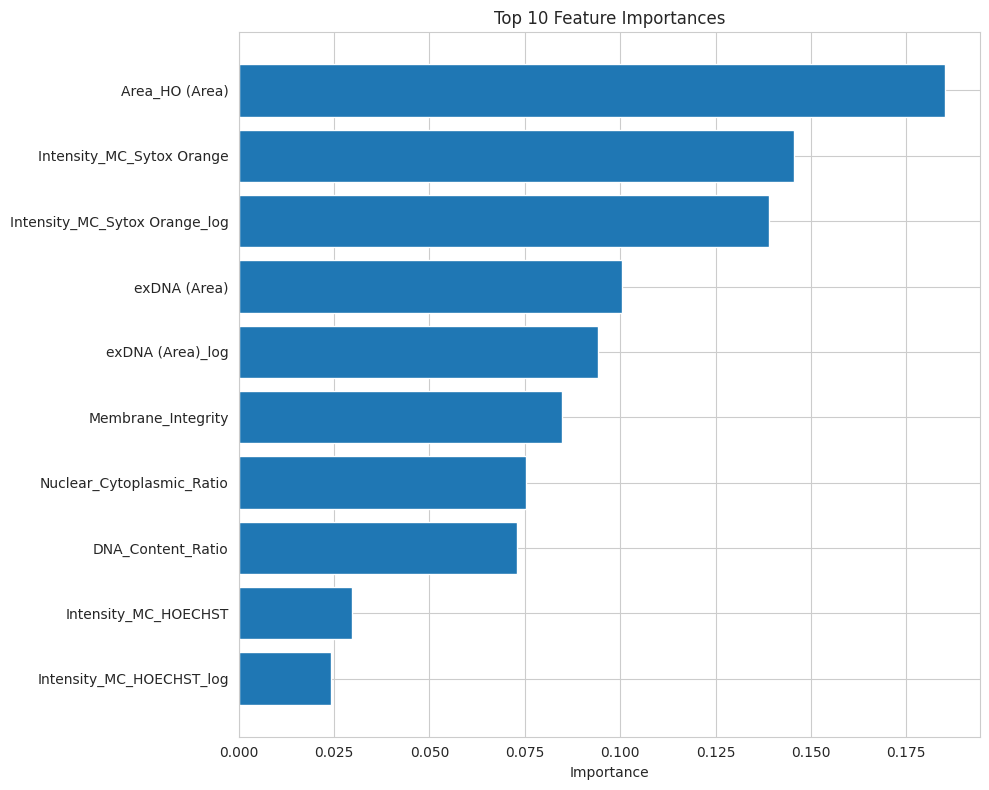


COST-BENEFIT ANALYSIS

Annual Projections ( 10000  samples/year):
Manual time: 833.3333333333333  hours ( 0.4006410256410256  FTE)
Automated time: 16.666666666666668  hours ( 0.008012820512820514  FTE)
Time saved: 816.6666666666666  hours

Annual Cost Analysis:
Manual cost: $ 41666.666666666664
Automated cost: $ 833.3333333333334
**Annual savings: $ 40833.33333333333 **

Accuracy: 0.9992880028479886  ( 99.92880028479885 %)

SAVING RESULTS
✓ Model and scaler saved successfully
✓ Predictions saved successfully
✓ Feature importance saved successfully

ANALYSIS COMPLETE!


In [1]:
# ===================================================================
# ENHANCED NEUTROPHIL FLOW CYTOMETRY CLASSIFICATION
# Portfolio Project 2 - Comprehensive ML Implementation
# Google Colab Ready Version
# ===================================================================

# ===================================================================
# 1. SETUP AND IMPORTS
# ===================================================================

# Install required packages
!pip install shap imbalanced-learn umap-learn scikit-plot seaborn -q

# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedKFold,
    RepeatedStratifiedKFold, GridSearchCV
)
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_fscore_support, roc_auc_score, roc_curve
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import shap
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

print("✓ All packages imported successfully")

# ===================================================================
# 2. MOUNT GOOGLE DRIVE AND LOAD DATA
# ===================================================================

from google.colab import drive
drive.mount('/content/drive')

# Load the combined data file
data_path = '/content/drive/My Drive/Flow Data/Combined_Data.csv'
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# ===================================================================
# 3. DATA PREPROCESSING & CELL TYPE CLASSIFICATION
# ===================================================================

print("\n" + "="*60)
print("DATA PREPROCESSING & CELL TYPE CLASSIFICATION")
print("="*60)

# Define features and target
feature_cols = [
    'Area_M01', 'Aspect Ratio_M01', 'Gradient RMS_M01_BF 1',
    'Intensity_MC_Sytox Orange', 'Intensity_MC_HOECHST',
    'Area_HO (Area)', 'exDNA (Area)', 'Circularity HO'
]

# Handle compensation matrix corrections
def handle_compensation_artifacts(df, features):
    """
    Handle negative values from compensation matrix corrections
    Common in flow cytometry data
    """
    df_clean = df.copy()

    for col in features:
        if df_clean[col].min() < 0:
            print("Handling negative values in", col)
            min_val = df_clean[col].min()
            df_clean[col] = df_clean[col] - min_val + 1

    return df_clean

df = handle_compensation_artifacts(df, feature_cols)

# Handle debris removal
debris_threshold = df['Area_M01'].quantile(0.01)
print("\nRemoving debris (Area <", debris_threshold, ")")
df = df[df['Area_M01'] > debris_threshold].copy()

# ===================================================================
# APPLY CELL TYPE CATEGORIZATION (FROM ORIGINAL STUDY)
# ===================================================================

print("\n" + "="*60)
print("APPLYING CELL TYPE CATEGORIZATION")
print("="*60)

def categorize_cell(row):
    """
    Categorize cells based on study thresholds
    """
    if row['Intensity_MC_Sytox Orange'] < 50000 and row['Area_HO (Area)'] < 50 and row['exDNA (Area)'] == 0:
        return 'Type I - Healthy Neutrophils'
    elif row['Intensity_MC_Sytox Orange'] < 50000 and row['Area_HO (Area)'] > 50 and row['exDNA (Area)'] == 0:
        return 'Type II - Early NET Precursor'
    elif row['Intensity_MC_Sytox Orange'] > 200000 and row['exDNA (Area)'] > 50:
        return 'Type III - Fully Formed NETs'
    elif row['exDNA (Area)'] > 50 and row['Intensity_MC_HOECHST'] < 500000:
        return 'Type IV - DNA Fragments'
    elif row['Intensity_MC_Sytox Orange'] > 100000 and row['Area_HO (Area)'] < 50 and row['exDNA (Area)'] == 0:
        return 'Type V - Dead Cells with Condensed Nucleus'
    elif row['Intensity_MC_Sytox Orange'] > 100000 and row['Area_HO (Area)'] > 50 and row['exDNA (Area)'] == 0:
        return 'Type VI - Dead Cells with Diffuse Nucleus'
    else:
        return 'Unclassified'

# Apply categorization
print("Categorizing cells based on flow cytometry parameters...")
df['Cell Type'] = df.apply(categorize_cell, axis=1)

# Check class distribution
print("\nCell Type Distribution:")
print(df['Cell Type'].value_counts())
print("\nCell Type Percentages:")
print(df['Cell Type'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(14, 7))
df['Cell Type'].value_counts().plot(kind='bar')
plt.title('Cell Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Treatment group distribution by cell type
print("\nCell Type by Treatment Group:")
print(pd.crosstab(df['Cell Type'], df['Treatment Group']))

# Visualize treatment group comparison
fig, ax = plt.subplots(figsize=(14, 7))
pd.crosstab(df['Cell Type'], df['Treatment Group']).plot(kind='bar', ax=ax)
plt.title('Cell Type Distribution by Treatment Group', fontsize=14, fontweight='bold')
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Treatment Group')
plt.tight_layout()
plt.show()

# ===================================================================
# 4. FEATURE ENGINEERING
# ===================================================================

print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# Create additional engineered features
df['Nuclear_Cytoplasmic_Ratio'] = df['Area_HO (Area)'] / (df['Area_M01'] + 1)
df['DNA_Content_Ratio'] = df['exDNA (Area)'] / (df['Area_HO (Area)'] + 1)
df['Cell_Density'] = df['Intensity_MC_HOECHST'] / (df['Area_M01'] + 1)
df['Membrane_Integrity'] = df['Intensity_MC_Sytox Orange'] / (df['Area_M01'] + 1)

# Log transformations for skewed features
skewed_features = ['Intensity_MC_Sytox Orange', 'Intensity_MC_HOECHST', 'exDNA (Area)']
for feat in skewed_features:
    df[feat + '_log'] = np.log1p(df[feat])

# Update feature list
engineered_features = [
    'Nuclear_Cytoplasmic_Ratio', 'DNA_Content_Ratio',
    'Cell_Density', 'Membrane_Integrity'
] + [feat + '_log' for feat in skewed_features]

all_features = feature_cols + engineered_features

print("Total features:", len(all_features))
print("Features:", all_features)

# ===================================================================
# 5. TRAIN-TEST SPLIT WITH STRATIFICATION
# ===================================================================

print("\n" + "="*60)
print("TRAIN-TEST SPLIT")
print("="*60)

X = df[all_features].copy()
y = df['Cell Type'].copy()

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nTraining set class distribution:")
print(y_train.value_counts())

# ===================================================================
# 6. FEATURE SCALING
# ===================================================================

print("\n" + "="*60)
print("FEATURE SCALING")
print("="*60)

# Use RobustScaler for flow cytometry data
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("✓ Features scaled using RobustScaler")

# ===================================================================
# 7. HANDLING CLASS IMBALANCE WITH SMOTE-TOMEK
# ===================================================================

print("\n" + "="*60)
print("ADDRESSING CLASS IMBALANCE")
print("="*60)

print("\nOriginal class distribution:")
print(y_train.value_counts())

# Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(
    X_train_scaled, y_train
)

print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# ===================================================================
# 8. MODEL TRAINING - RANDOM FOREST (OPTIMIZED)
# ===================================================================

print("\n" + "="*60)
print("MODEL TRAINING: RANDOM FOREST")
print("="*60)

# OPTIMIZED: Smaller, more focused parameter grid
rf_param_grid = {
    'n_estimators': [200],
    'max_depth': [20, 30],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'class_weight': ['balanced']
}

# Initialize Random Forest
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid Search with Cross-Validation (3-fold for speed)
rf_grid = GridSearchCV(
    rf_base,
    rf_param_grid,
    cv=3,  # Reduced from 5 to 3 for speed
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

print("Training Random Forest with Grid Search...")
print("Testing", len(rf_param_grid['n_estimators']) * len(rf_param_grid['max_depth']) *
      len(rf_param_grid['min_samples_split']) * len(rf_param_grid['min_samples_leaf']) *
      len(rf_param_grid['class_weight']), "combinations with 3-fold CV")

rf_grid.fit(X_train_resampled, y_train_resampled)

print("\nBest parameters:", rf_grid.best_params_)
print("Best CV score:", rf_grid.best_score_)

# Best model
rf_model = rf_grid.best_estimator_

# ===================================================================
# 9. MODEL EVALUATION
# ===================================================================

print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

# Predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=rf_model.classes_,
    yticklabels=rf_model.classes_
)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Per-class metrics
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred, average=None
)

metrics_df = pd.DataFrame({
    'Class': rf_model.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("\nPer-Class Metrics:")
print(metrics_df)

# ===================================================================
# 10. REPEATED STRATIFIED CROSS-VALIDATION
# ===================================================================

print("\n" + "="*60)
print("REPEATED STRATIFIED CROSS-VALIDATION")
print("="*60)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_scores = cross_val_score(
    rf_model, X_train_resampled, y_train_resampled,
    cv=rskf, scoring='accuracy', n_jobs=-1
)

print("\nCross-validation results:")
print("Mean accuracy:", cv_scores.mean(), "(+/-", cv_scores.std() * 2, ")")
print("Min accuracy:", cv_scores.min())
print("Max accuracy:", cv_scores.max())

# Visualize CV scores
plt.figure(figsize=(10, 6))
plt.boxplot([cv_scores])
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores Distribution')
plt.show()

# ===================================================================
# 11. SHAP ANALYSIS FOR INTERPRETABILITY
# ===================================================================

print("\n" + "="*60)
print("SHAP ANALYSIS")
print("="*60)

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values,
    X_test_scaled,
    plot_type="bar",
    class_names=rf_model.classes_,
    show=False
)
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance.head(10)['Feature'],
    feature_importance.head(10)['Importance']
)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ===================================================================
# 12. COST-BENEFIT ANALYSIS
# ===================================================================

print("\n" + "="*60)
print("COST-BENEFIT ANALYSIS")
print("="*60)

def calculate_cost_benefit(
    y_true, y_pred,
    manual_time_per_sample=5.0,
    automated_time_per_sample=0.1,
    tech_hourly_rate=50.0,
    samples_per_year=10000
):
    """Calculate cost-benefit of automated classification"""
    n_samples = len(y_true)
    accuracy = accuracy_score(y_true, y_pred)

    # Time calculations
    manual_time_hours = (manual_time_per_sample / 60) * samples_per_year
    automated_time_hours = (automated_time_per_sample / 60) * samples_per_year
    time_saved_hours = manual_time_hours - automated_time_hours

    # Cost calculations
    manual_cost = manual_time_hours * tech_hourly_rate
    automated_cost = automated_time_hours * tech_hourly_rate
    cost_saved = manual_cost - automated_cost

    print("\nAnnual Projections (", samples_per_year, " samples/year):")
    print("Manual time:", manual_time_hours, " hours (", manual_time_hours/2080, " FTE)")
    print("Automated time:", automated_time_hours, " hours (", automated_time_hours/2080, " FTE)")
    print("Time saved:", time_saved_hours, " hours")
    print("\nAnnual Cost Analysis:")
    print("Manual cost: $", manual_cost)
    print("Automated cost: $", automated_cost)
    print("**Annual savings: $", cost_saved, "**")
    print("\nAccuracy:", accuracy, " (", accuracy*100, "%)")

    return {
        'time_saved': time_saved_hours,
        'cost_saved': cost_saved,
        'accuracy': accuracy
    }

cost_benefit = calculate_cost_benefit(y_test, y_pred)

# ===================================================================
# 13. SAVE MODEL AND RESULTS
# ===================================================================

print("\n" + "="*60)
print("SAVING RESULTS")
print("="*60)

# Save model
import joblib
joblib.dump(rf_model, '/content/drive/My Drive/Flow Data/rf_model.pkl')
joblib.dump(scaler, '/content/drive/My Drive/Flow Data/scaler.pkl')

print("✓ Model and scaler saved successfully")

# Save predictions
results_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': y_pred,
    'Correct': y_test == y_pred
})
results_df.to_csv('/content/drive/My Drive/Flow Data/predictions.csv', index=False)

print("✓ Predictions saved successfully")

# Save feature importance
feature_importance.to_csv(
    '/content/drive/My Drive/Flow Data/feature_importance.csv',
    index=False
)

print("✓ Feature importance saved successfully")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)

In [2]:
# Install nbconvert and related dependencies
!pip install nbconvert[output] -q

# Export the notebook to PDF
try:
    !jupyter nbconvert --to pdf /content/drive/My\ Drive/Flow\ Data/Enhanced_Neutrophil_Flow_Cytometry_Classification.ipynb --output /content/drive/My\ Drive/Flow\ Data/Enhanced_Neutrophil_Flow_Cytometry_Classification.pdf
    print("\n✓ Notebook exported to PDF successfully!")
except Exception as e:
    print(f"\nAn error occurred during PDF export: {e}")
    print("Please ensure you have the necessary permissions and the correct notebook path.")

[NbConvertApp] WARNING | pattern '/content/drive/My Drive/Flow Data/Enhanced_Neutrophil_Flow_Cytometry_Classification.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of pr